In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore


In [3]:
# Read the dataset

Churn_df = pd.read_csv("ACMETelephoneABT.csv")  

Churn_df.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,,,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [4]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
customer                      10000 non-null int64
 age                          10000 non-null int64
 occupation                   10000 non-null object
 regionType                   10000 non-null object
marriageStatus                10000 non-null object
 children                     10000 non-null object
 income                       10000 non-null int64
numHandsets                   10000 non-null int64
handsetAge                    10000 non-null int64
smartPhone                    10000 non-null object
currentHandsetPrice           10000 non-null float64
 creditRating                 10000 non-null object
homeOwner                     10000 non-null object
 creditCard                   10000 non-null object
avgBill                       10000 non-null float64
avgMins                       10000 non-null float64
avgrecurringCharge            10000 non-null float64
avgOverBu

In [5]:
#Create a new function to figure out missing values:

def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (Churn_df.apply(num_missing, axis=0))

Missing values per column:
customer                      0
 age                          0
 occupation                   0
 regionType                   0
marriageStatus                0
 children                     0
 income                       0
numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
 creditRating                 0
homeOwner                     0
 creditCard                   0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionO

In [6]:
cols = Churn_df.columns
cols

Index(['customer', ' age', ' occupation', ' regionType', 'marriageStatus',
       ' children', ' income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', ' creditRating', 'homeOwner', ' creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [7]:
Churn_df.loc[:, cols] = Churn_df.loc[:, cols].replace (r'^\s*$', np.nan, regex=True)

In [8]:
Churn_df.head(20)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false
5,1000100,40,homemaker,rural,yes,true,7,4,161,true,...,7.00,5.396667,-17.093421,9.33,54,0.00,0,0,0,false
6,1000121,52,NaN,NaN,no,false,3,1,1619,false,...,0.00,0.788806,-0.583749,0.00,54,0.00,0,0,0,false
7,1000135,32,clerical,NaN,yes,false,5,3,10,true,...,3.33,3.367766,-11.545658,11.67,49,0.33,0,0,0,false
8,1000143,40,NaN,NaN,unknown,false,5,11,124,true,...,28.00,4.309086,21.520380,30.33,53,4.67,0,0,0,false
9,1000164,42,NaN,NaN,yes,true,4,2,517,true,...,0.00,5.714286,9.369332,1.67,49,0.00,0,0,0,false


In [9]:
#Applying per column:
print ("Missing values per column:")
print (Churn_df.apply(num_missing, axis=0))

Missing values per column:
customer                         0
 age                             0
 occupation                   7400
 regionType                   4776
marriageStatus                   0
 children                        0
 income                          0
numHandsets                      0
handsetAge                       0
smartPhone                       0
currentHandsetPrice              0
 creditRating                    0
homeOwner                        0
 creditCard                      0
avgBill                          0
avgMins                          0
avgrecurringCharge               0
avgOverBundleMins                0
avgRoamCalls                     0
callMinutesChangePct             0
billAmountChangePct              0
avgReceivedMins                  0
avgOutCalls                      0
avgInCalls                       0
peakOffPeakRatio                 0
peakOffPeakRatioChangePct        0
avgDroppedCalls                  0
lifeTime                    

In [10]:
Churn_df_trimmed = Churn_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
#Applying per column:
print ("Missing values per column:")
print (Churn_df_trimmed.apply(num_missing, axis=0))

Missing values per column:
customer                         0
 age                             0
 occupation                   7400
 regionType                   4776
marriageStatus                   0
 children                        0
 income                          0
numHandsets                      0
handsetAge                       0
smartPhone                       0
currentHandsetPrice              0
 creditRating                    0
homeOwner                        0
 creditCard                      0
avgBill                          0
avgMins                          0
avgrecurringCharge               0
avgOverBundleMins                0
avgRoamCalls                     0
callMinutesChangePct             0
billAmountChangePct              0
avgReceivedMins                  0
avgOutCalls                      0
avgInCalls                       0
peakOffPeakRatio                 0
peakOffPeakRatioChangePct        0
avgDroppedCalls                  0
lifeTime                    

In [12]:
Churn_df_trimmed.head(20)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false
5,1000100,40,homemaker,rural,yes,true,7,4,161,true,...,7.00,5.396667,-17.093421,9.33,54,0.00,0,0,0,false
6,1000121,52,NaN,NaN,no,false,3,1,1619,false,...,0.00,0.788806,-0.583749,0.00,54,0.00,0,0,0,false
7,1000135,32,clerical,NaN,yes,false,5,3,10,true,...,3.33,3.367766,-11.545658,11.67,49,0.33,0,0,0,false
8,1000143,40,NaN,NaN,unknown,false,5,11,124,true,...,28.00,4.309086,21.520380,30.33,53,4.67,0,0,0,false
9,1000164,42,NaN,NaN,yes,true,4,2,517,true,...,0.00,5.714286,9.369332,1.67,49,0.00,0,0,0,false


In [13]:
Churn_df_trimmed1 = Churn_df_trimmed.copy()

In [14]:
Churn_df_trimmed1.columns.values

array(['customer', ' age', ' occupation', ' regionType', 'marriageStatus',
       ' children', ' income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', ' creditRating', 'homeOwner', ' creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'], dtype=object)

In [15]:
Churn_df_trimmed1.columns = Churn_df_trimmed1.columns.str.strip()

In [16]:
Churn_df_trimmed1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
customer                      10000 non-null int64
age                           10000 non-null int64
occupation                    2600 non-null object
regionType                    5224 non-null object
marriageStatus                10000 non-null object
children                      10000 non-null object
income                        10000 non-null int64
numHandsets                   10000 non-null int64
handsetAge                    10000 non-null int64
smartPhone                    10000 non-null object
currentHandsetPrice           10000 non-null float64
creditRating                  10000 non-null object
homeOwner                     10000 non-null object
creditCard                    10000 non-null object
avgBill                       10000 non-null float64
avgMins                       10000 non-null float64
avgrecurringCharge            10000 non-null float64
avgOverBund

In [17]:
Churn_df_trimmed1.children.replace(to_replace=dict(true=1, false=0), inplace=True)

In [18]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,1,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,1,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,0,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,0,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,0,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [19]:
Churn_df_trimmed1.smartPhone.replace(to_replace=dict(true=1, false=0), inplace=True)

In [20]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [21]:
Churn_df_trimmed1.creditCard.replace(to_replace=dict(true=1, false=0), inplace=True)

In [22]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [23]:
Churn_df_trimmed1.marriageStatus.replace(to_replace=dict(yes=1, no=0, unknown=2), inplace=True)

In [24]:
Churn_df_trimmed1.head(20)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false
5,1000100,40,homemaker,rural,1,1,7,4,161,1,...,7.00,5.396667,-17.093421,9.33,54,0.00,0,0,0,false
6,1000121,52,NaN,NaN,0,0,3,1,1619,0,...,0.00,0.788806,-0.583749,0.00,54,0.00,0,0,0,false
7,1000135,32,clerical,NaN,1,0,5,3,10,1,...,3.33,3.367766,-11.545658,11.67,49,0.33,0,0,0,false
8,1000143,40,NaN,NaN,2,0,5,11,124,1,...,28.00,4.309086,21.520380,30.33,53,4.67,0,0,0,false
9,1000164,42,NaN,NaN,1,1,4,2,517,1,...,0.00,5.714286,9.369332,1.67,49,0.00,0,0,0,false


In [25]:
Churn_df_trimmed1.churn.replace(to_replace=dict(true=1, false=0), inplace=True)

In [26]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,1000012,36,NaN,NaN,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,1000034,74,professional,town,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,1000063,30,NaN,suburban,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,1000085,32,NaN,town,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [27]:
Churn_df_trimmed1 = Churn_df_trimmed1.fillna({"regionType": "unknown"})

In [28]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,1000012,36,NaN,unknown,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,1000034,74,professional,town,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,1000063,30,NaN,suburban,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,1000085,32,NaN,town,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [29]:
Churn_df_trimmed1 = Churn_df_trimmed1.fillna({"occupation": "unknown"})

In [30]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,1000012,36,unknown,unknown,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,1000034,74,professional,town,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,1000063,30,unknown,suburban,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,1000085,32,unknown,town,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [31]:
Churn_df_trimmed1["occupation"] = Churn_df_trimmed1["occupation"].astype('category')
Churn_df_trimmed1.dtypes


customer                         int64
age                              int64
occupation                    category
regionType                      object
marriageStatus                   int64
children                         int64
income                           int64
numHandsets                      int64
handsetAge                       int64
smartPhone                       int64
currentHandsetPrice            float64
creditRating                    object
homeOwner                       object
creditCard                      object
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct

In [32]:
Churn_df_trimmed1["occupation"] = Churn_df_trimmed1["occupation"].cat.codes

In [33]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,1,town,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,1000012,36,7,unknown,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,1000034,74,3,town,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,1000063,30,7,suburban,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,1000085,32,7,town,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [34]:
Churn_df_trimmed1.dtypes

customer                        int64
age                             int64
occupation                       int8
regionType                     object
marriageStatus                  int64
children                        int64
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                      int64
currentHandsetPrice           float64
creditRating                   object
homeOwner                      object
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [35]:
Churn_df_trimmed1.regionType.replace(to_replace=dict(s="suburban", t="town", r="rural"), inplace=True)


In [36]:
print(Churn_df_trimmed1.loc[Churn_df_trimmed1['customer'] == 1002439])

     customer  age  occupation regionType  marriageStatus  children  income  \
120   1002439   28           7   suburban               2         0       5   

     numHandsets  handsetAge  smartPhone  ...    avgInCalls peakOffPeakRatio  \
120            2         982           1  ...           1.0         2.254627   

    peakOffPeakRatioChangePct avgDroppedCalls  lifeTime  \
120                 19.030933             3.0        38   

     lastMonthCustomerCareCalls  numRetentionCalls  \
120                        2.67                  0   

     numRetentionOffersAccepted  newFrequentNumbers  churn  
120                           0                   0      0  

[1 rows x 33 columns]


In [37]:
Churn_df_trimmed1.regionType.unique()

array(['town', 'unknown', 'suburban', 'rural'], dtype=object)

In [38]:
Churn_df_trimmed1["regionType"] = Churn_df_trimmed1["regionType"].astype('category')
Churn_df_trimmed1["regionType"] = Churn_df_trimmed1["regionType"].cat.codes

In [39]:
Churn_df_trimmed1.regionType.unique()

array([2, 3, 1, 0], dtype=int64)

In [40]:
Churn_df_trimmed1.creditRating.unique()

array(['C', 'A', 'D', 'E', 'G', 'B', 'F'], dtype=object)

In [41]:
Churn_df_trimmed1["creditRating"] = Churn_df_trimmed1["creditRating"].astype('category')
Churn_df_trimmed1["creditRating"] = Churn_df_trimmed1["creditRating"].cat.codes

In [42]:
Churn_df_trimmed1.creditRating.unique()

array([2, 0, 3, 4, 6, 1, 5], dtype=int64)

In [43]:
Churn_df_trimmed1.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,1,2,1,1,6,1,1812,0,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,1000012,36,7,3,1,1,9,4,544,1,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,1000034,74,3,2,1,0,7,2,138,1,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,1000063,30,7,1,0,0,6,3,122,1,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,1000085,32,7,2,1,0,7,8,10,1,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [44]:
Churn_df_trimmed1.dtypes


customer                        int64
age                             int64
occupation                       int8
regionType                       int8
marriageStatus                  int64
children                        int64
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                      int64
currentHandsetPrice           float64
creditRating                     int8
homeOwner                      object
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [45]:
Churn_df_trimmed1.creditCard.replace(to_replace=dict(yes=1, no=0, t=1, f=0), inplace=True)

In [46]:
Churn_df_trimmed1.dtypes

customer                        int64
age                             int64
occupation                       int8
regionType                       int8
marriageStatus                  int64
children                        int64
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                      int64
currentHandsetPrice           float64
creditRating                     int8
homeOwner                      object
creditCard                      int64
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [47]:
Churn_df_trimmed1.homeOwner.replace(to_replace=dict(true=1, false=0), inplace=True)

In [48]:
Churn_df_trimmed1['age_imp'] = Churn_df_trimmed1.age.apply(lambda x: np.median(Churn_df_trimmed1['age']) if x == 0 else x)

In [49]:
Churn_df_trimmed1.head(30)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,age_imp
0,1000004,26,1,2,1,1,6,1,1812,0,...,0.362398,-6.330770,0.00,60,0.00,0,0,0,0,26.0
1,1000012,36,7,3,1,1,9,4,544,1,...,5.586826,7.499560,0.00,53,0.00,0,0,0,0,36.0
2,1000034,74,3,2,1,0,7,2,138,1,...,0.500000,-5.940493,4.33,58,0.00,0,0,3,0,74.0
3,1000063,30,7,1,0,0,6,3,122,1,...,8.629661,-0.066485,5.33,50,0.33,0,0,0,0,30.0
4,1000085,32,7,2,1,0,7,8,10,1,...,14.042685,-7.208502,14.67,56,0.00,0,0,0,0,32.0
5,1000100,40,2,0,1,1,7,4,161,1,...,5.396667,-17.093421,9.33,54,0.00,0,0,0,0,40.0
6,1000121,52,7,3,0,0,3,1,1619,0,...,0.788806,-0.583749,0.00,54,0.00,0,0,0,0,52.0
7,1000135,32,0,3,1,0,5,3,10,1,...,3.367766,-11.545658,11.67,49,0.33,0,0,0,0,32.0
8,1000143,40,7,3,2,0,5,11,124,1,...,4.309086,21.520380,30.33,53,4.67,0,0,0,0,40.0
9,1000164,42,7,3,1,1,4,2,517,1,...,5.714286,9.369332,1.67,49,0.00,0,0,0,0,42.0


In [50]:
Churn_df_trimmed3 = Churn_df_trimmed1.drop('customer', axis=1).copy()

In [51]:
Churn_df_trimmed4 = Churn_df_trimmed3.drop('age', axis=1).copy()

In [52]:
Churn_df_trimmed4.head(20)

,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,...,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,age_imp
0,1,2,1,1,6,1,1812,0,0.00,2,...,0.362398,-6.330770,0.00,60,0.00,0,0,0,0,26.0
1,7,3,1,1,9,4,544,1,79.99,0,...,5.586826,7.499560,0.00,53,0.00,0,0,0,0,36.0
2,3,2,1,0,7,2,138,1,29.99,0,...,0.500000,-5.940493,4.33,58,0.00,0,0,3,0,74.0
3,7,1,0,0,6,3,122,1,9.99,2,...,8.629661,-0.066485,5.33,50,0.33,0,0,0,0,30.0
4,7,2,1,0,7,8,10,1,129.99,0,...,14.042685,-7.208502,14.67,56,0.00,0,0,0,0,32.0
5,2,0,1,1,7,4,161,1,9.99,0,...,5.396667,-17.093421,9.33,54,0.00,0,0,0,0,40.0
6,7,3,0,0,3,1,1619,0,0.00,3,...,0.788806,-0.583749,0.00,54,0.00,0,0,0,0,52.0
7,0,3,1,0,5,3,10,1,29.99,4,...,3.367766,-11.545658,11.67,49,0.33,0,0,0,0,32.0
8,7,3,2,0,5,11,124,1,149.99,2,...,4.309086,21.520380,30.33,53,4.67,0,0,0,0,40.0
9,7,3,1,1,4,2,517,1,29.99,0,...,5.714286,9.369332,1.67,49,0.00,0,0,0,0,42.0


In [53]:
Churn_df_trimmed4['handsetAge_Imp'] = Churn_df_trimmed4.handsetAge.apply(lambda x: np.median(Churn_df_trimmed4['handsetAge']) if x < 0 else x)

In [54]:
Churn_df_trimmed4[Churn_df_trimmed4['handsetAge'] < 0][["handsetAge", "handsetAge_Imp"]]

,handsetAge,handsetAge_Imp
206,-3,339.0
209,-1,339.0
384,-2,339.0
2007,-5,339.0
2230,-4,339.0
4087,-3,339.0
4094,-1,339.0
4796,-3,339.0
7089,-3,339.0
7392,-2,339.0


In [55]:
Churn_df_trimmed5 = Churn_df_trimmed4.drop('handsetAge', axis=1).copy()

In [56]:
Churn_df_trimmed5.head()

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,age_imp,handsetAge_Imp
0,1,2,1,1,6,1,0,0.00,2,1,...,-6.330770,0.00,60,0.00,0,0,0,0,26.0,1812.0
1,7,3,1,1,9,4,1,79.99,0,0,...,7.499560,0.00,53,0.00,0,0,0,0,36.0,544.0
2,3,2,1,0,7,2,1,29.99,0,0,...,-5.940493,4.33,58,0.00,0,0,3,0,74.0,138.0
3,7,1,0,0,6,3,1,9.99,2,0,...,-0.066485,5.33,50,0.33,0,0,0,0,30.0,122.0
4,7,2,1,0,7,8,1,129.99,0,0,...,-7.208502,14.67,56,0.00,0,0,0,0,32.0,10.0


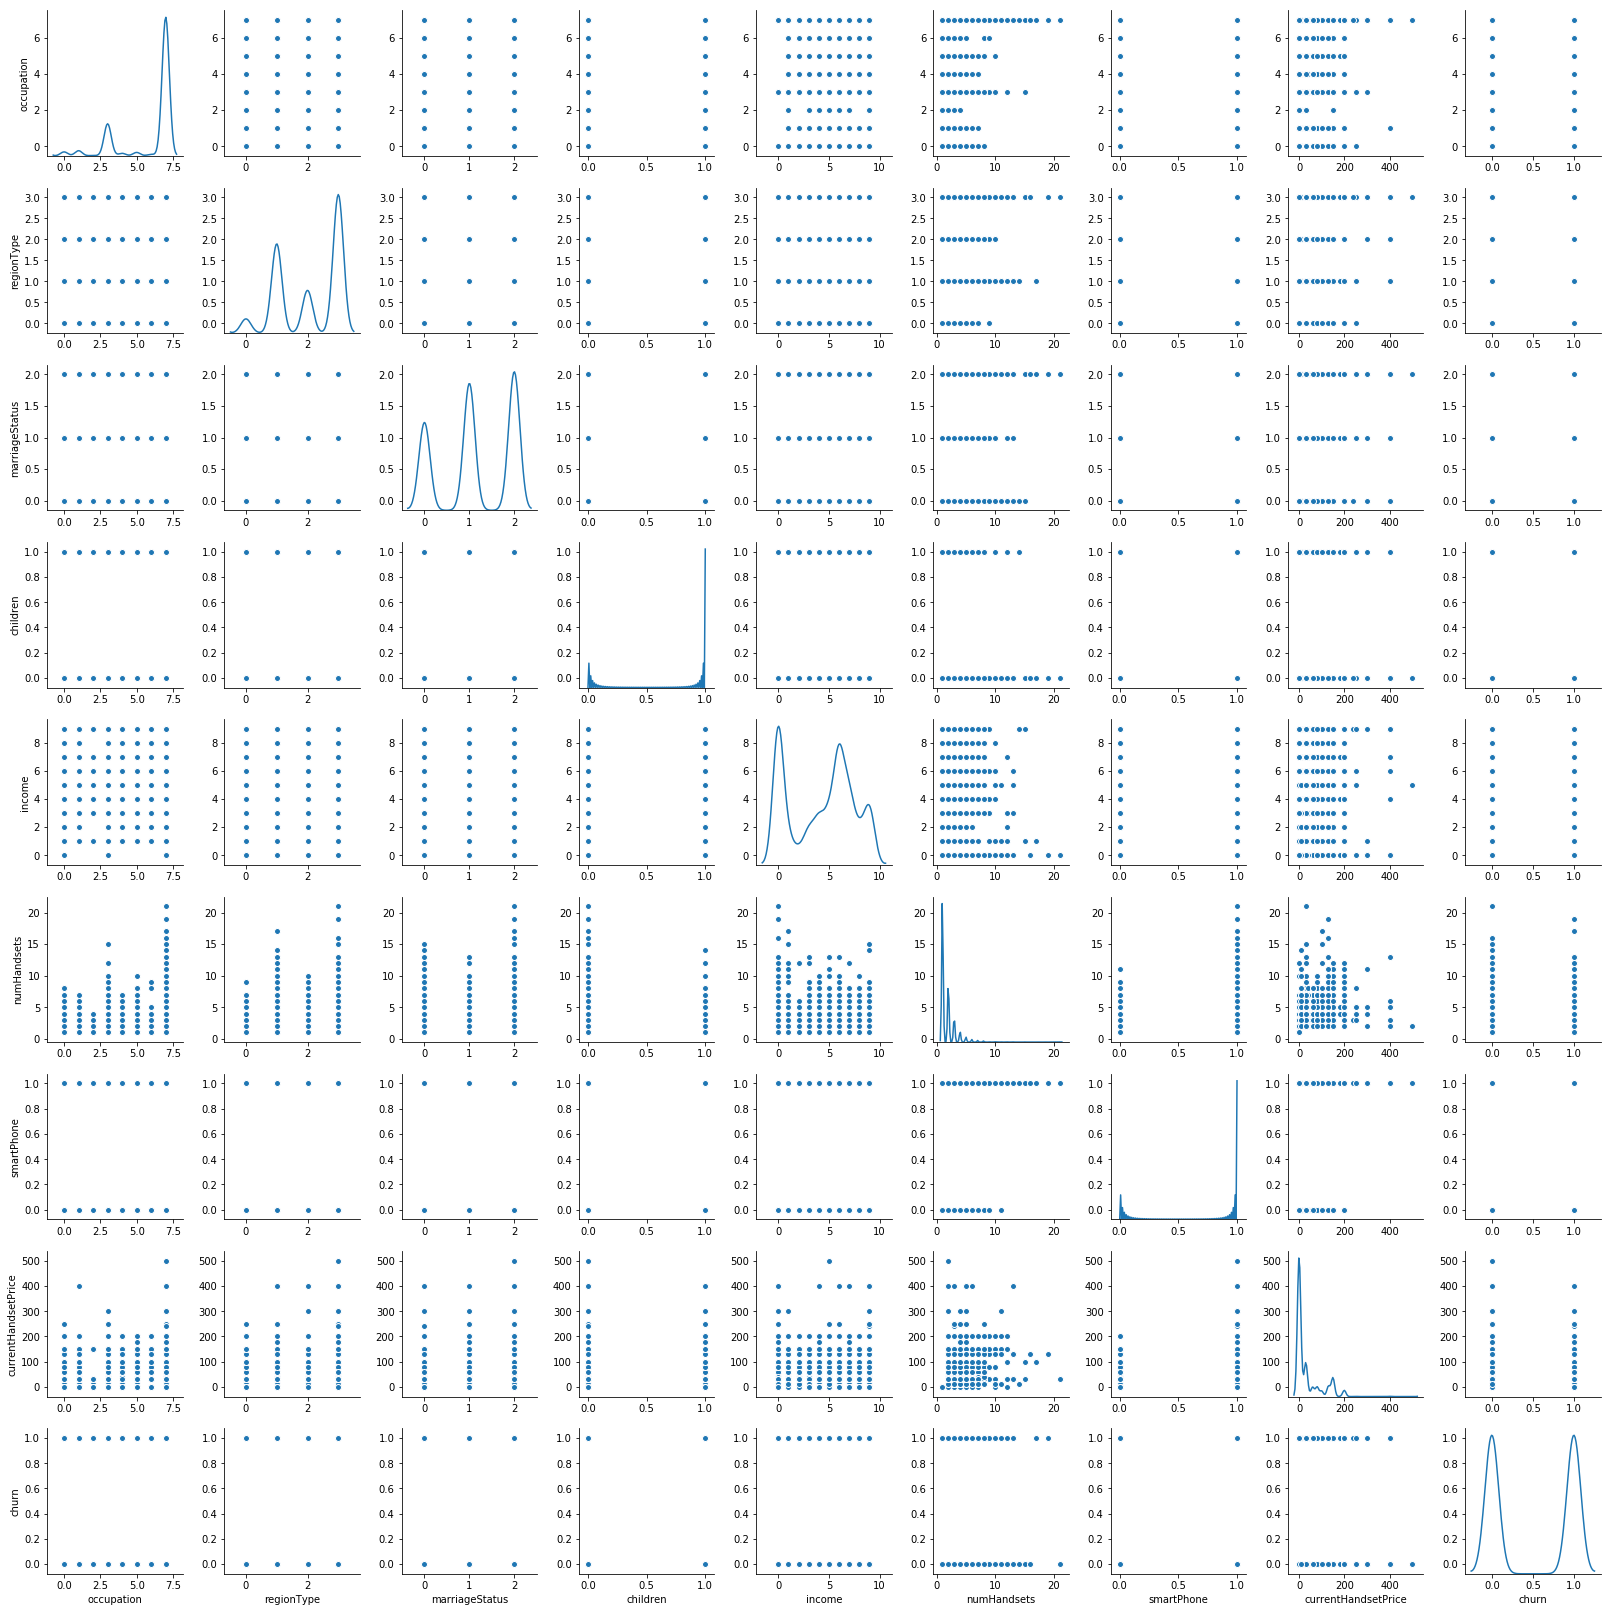

In [57]:
plt = sns.pairplot(Churn_df_trimmed5[['occupation','regionType','marriageStatus', 'children','income','numHandsets','smartPhone','currentHandsetPrice','churn']], diag_kind="kde")

In [58]:
Churn_df_trimmed5.dtypes

occupation                       int8
regionType                       int8
marriageStatus                  int64
children                        int64
income                          int64
numHandsets                     int64
smartPhone                      int64
currentHandsetPrice           float64
creditRating                     int8
homeOwner                       int64
creditCard                      int64
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetention

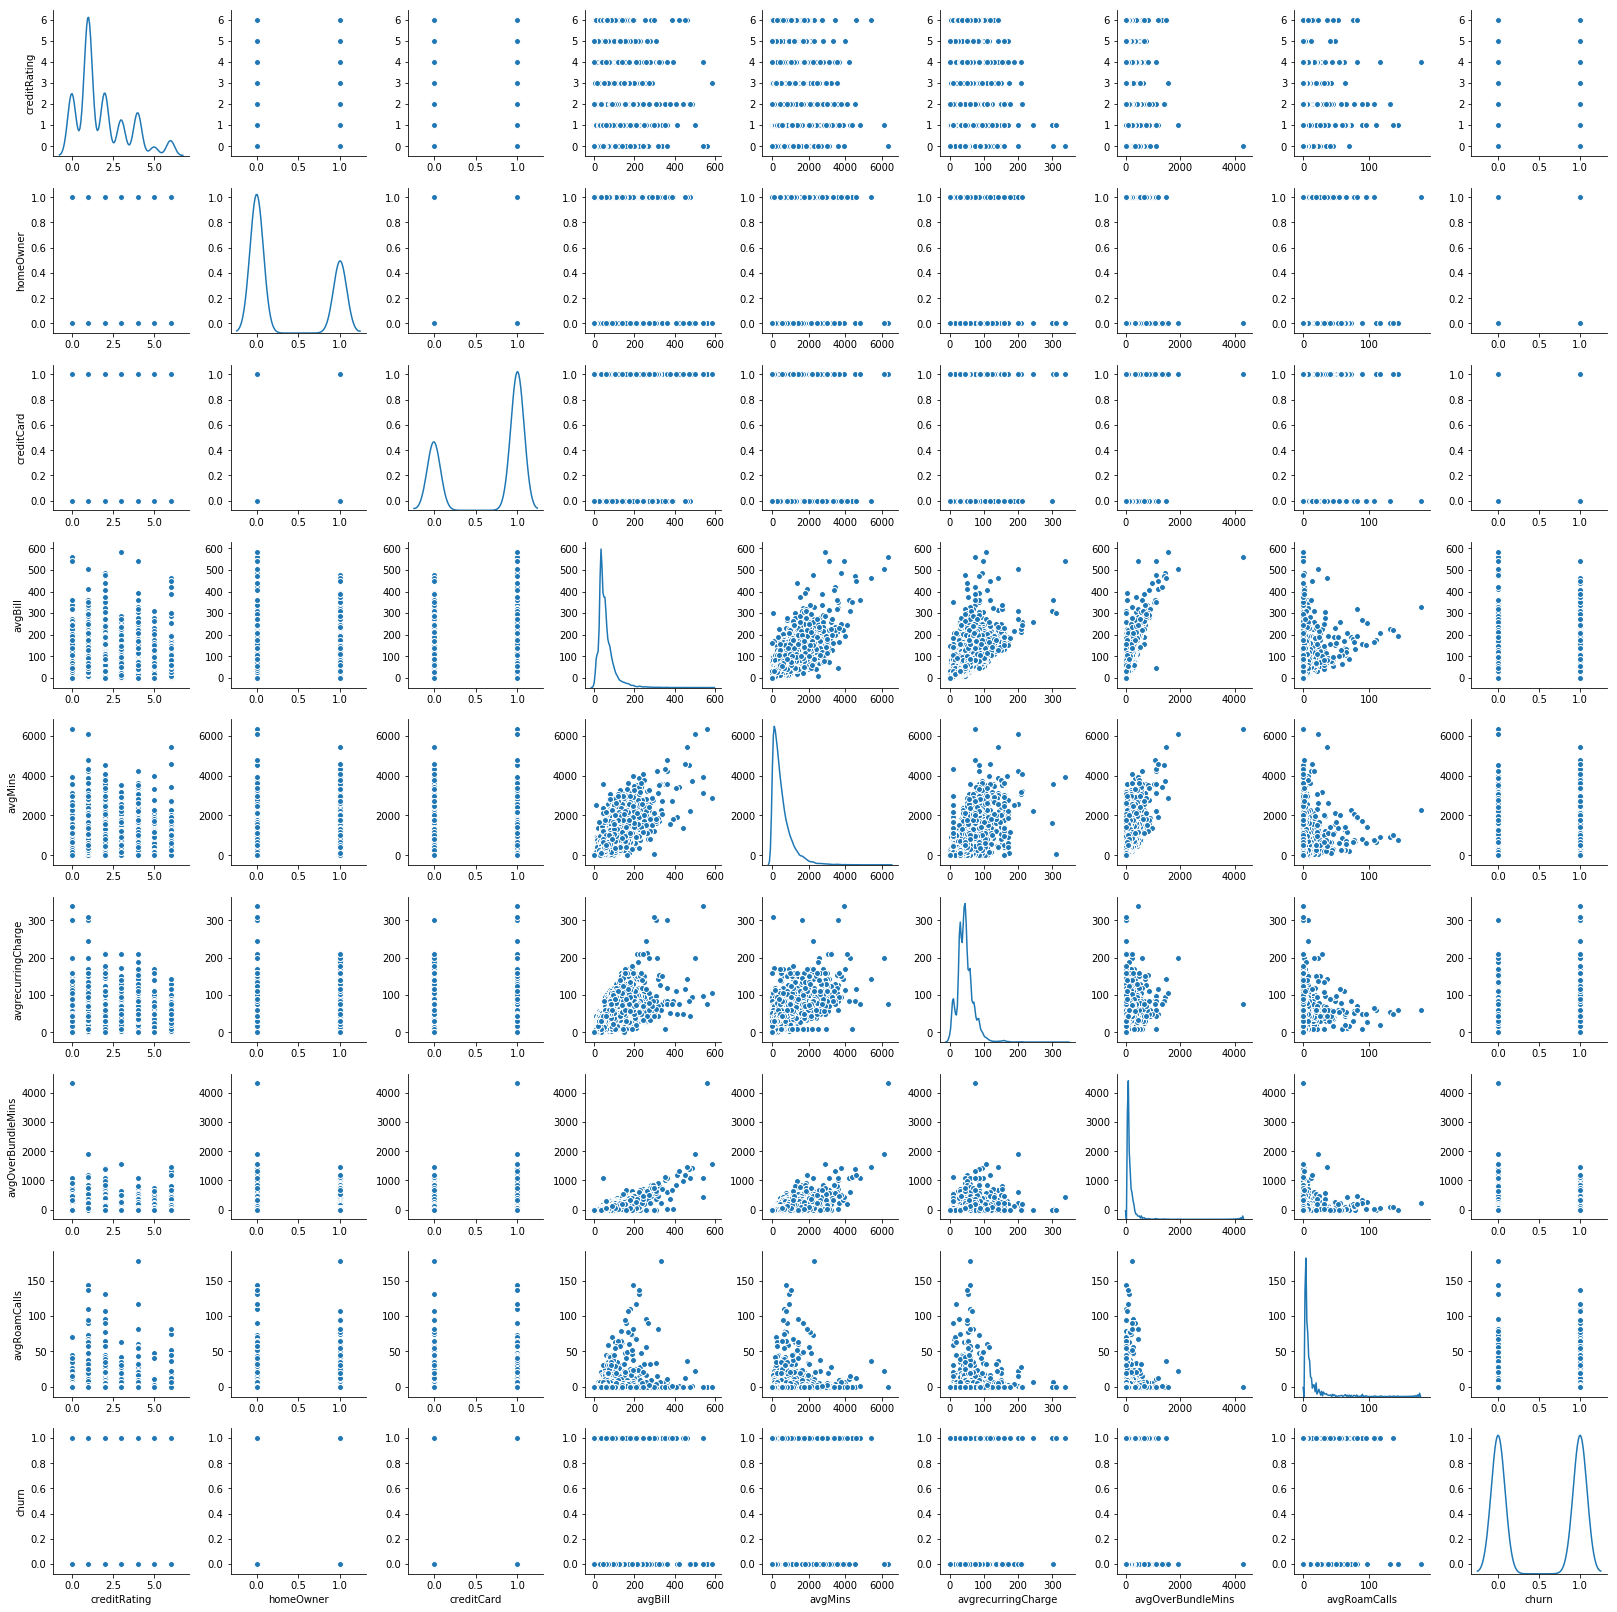

In [59]:
plt = sns.pairplot(Churn_df_trimmed5[['creditRating','homeOwner','creditCard', 'avgBill','avgMins','avgrecurringCharge','avgOverBundleMins','avgRoamCalls','churn']], diag_kind="kde")

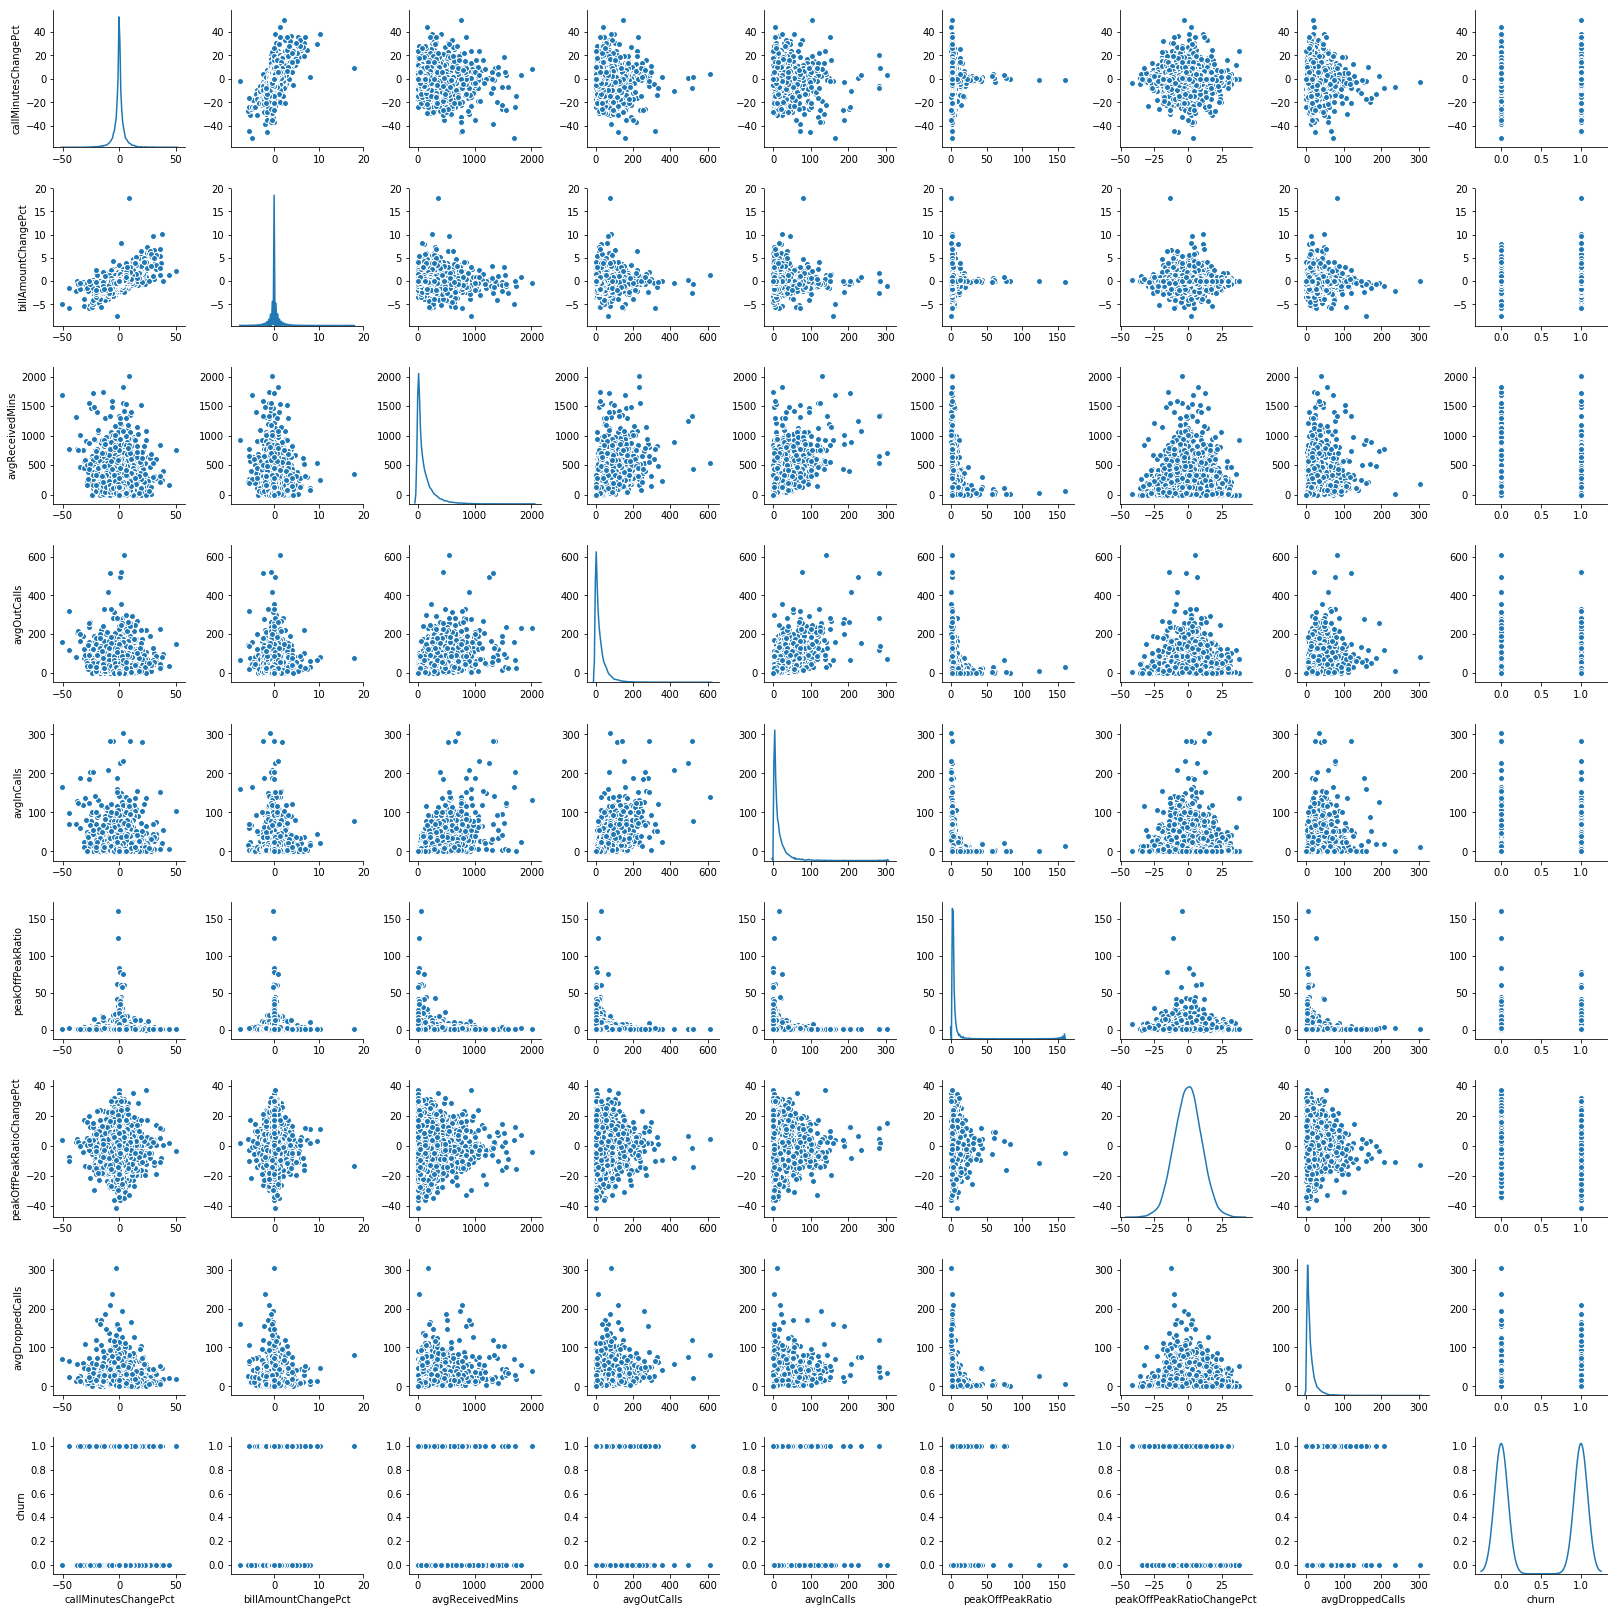

In [60]:
plt = sns.pairplot(Churn_df_trimmed5[['callMinutesChangePct','billAmountChangePct','avgReceivedMins', 'avgOutCalls','avgInCalls','peakOffPeakRatio','peakOffPeakRatioChangePct','avgDroppedCalls','churn']], diag_kind="kde")

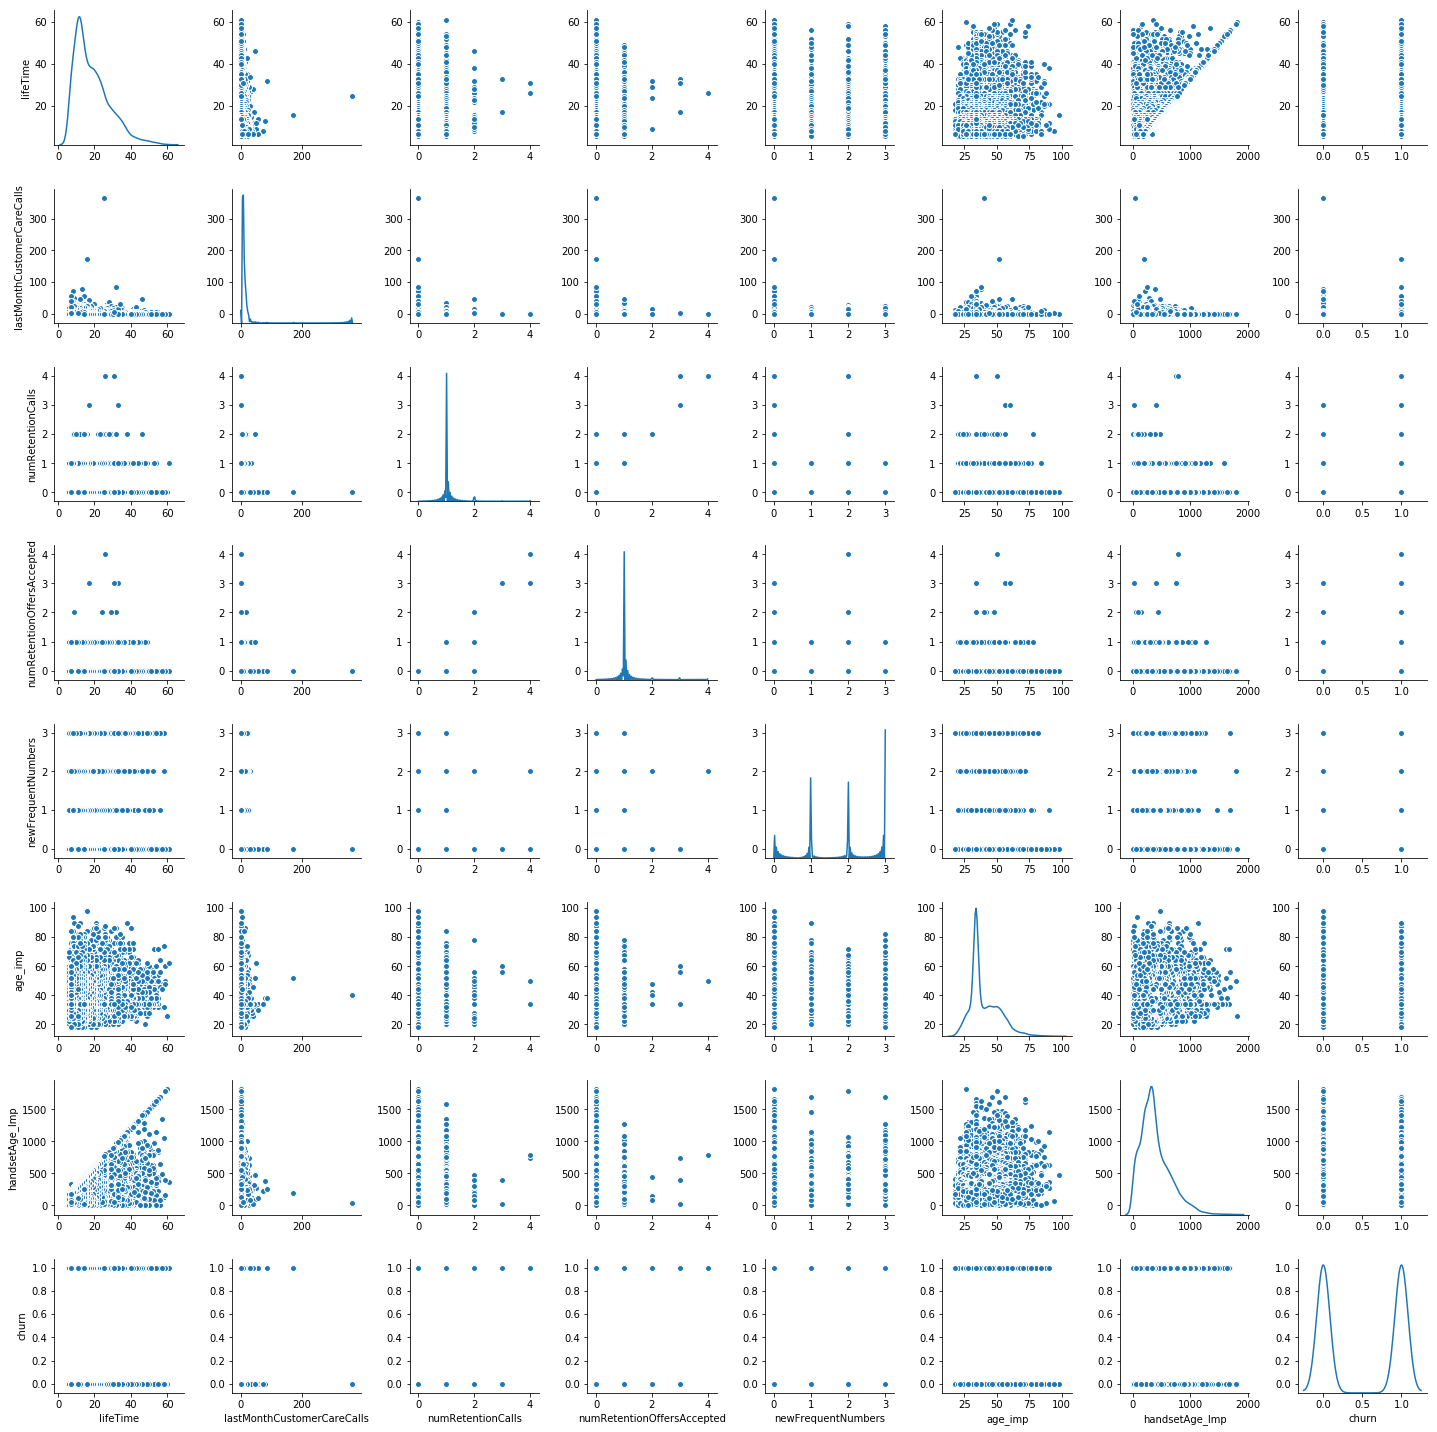

In [61]:
plt = sns.pairplot(Churn_df_trimmed5[['lifeTime','lastMonthCustomerCareCalls','numRetentionCalls', 'numRetentionOffersAccepted','newFrequentNumbers','age_imp','handsetAge_Imp','churn']], diag_kind="kde")

In [62]:
Churn_df_trimmed5['Churn_new'] = Churn_df_trimmed5['churn']

In [63]:
Churn_df_trimmed5.head(5)

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,age_imp,handsetAge_Imp,Churn_new
0,1,2,1,1,6,1,0,0.00,2,1,...,0.00,60,0.00,0,0,0,0,26.0,1812.0,0
1,7,3,1,1,9,4,1,79.99,0,0,...,0.00,53,0.00,0,0,0,0,36.0,544.0,0
2,3,2,1,0,7,2,1,29.99,0,0,...,4.33,58,0.00,0,0,3,0,74.0,138.0,0
3,7,1,0,0,6,3,1,9.99,2,0,...,5.33,50,0.33,0,0,0,0,30.0,122.0,0
4,7,2,1,0,7,8,1,129.99,0,0,...,14.67,56,0.00,0,0,0,0,32.0,10.0,0


In [64]:
Churn_df_trimmed6 = Churn_df_trimmed5.drop('churn', axis=1).copy()

In [65]:
Churn_df_trimmed6.head(5)

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,age_imp,handsetAge_Imp,Churn_new
0,1,2,1,1,6,1,0,0.00,2,1,...,-6.330770,0.00,60,0.00,0,0,0,26.0,1812.0,0
1,7,3,1,1,9,4,1,79.99,0,0,...,7.499560,0.00,53,0.00,0,0,0,36.0,544.0,0
2,3,2,1,0,7,2,1,29.99,0,0,...,-5.940493,4.33,58,0.00,0,0,3,74.0,138.0,0
3,7,1,0,0,6,3,1,9.99,2,0,...,-0.066485,5.33,50,0.33,0,0,0,30.0,122.0,0
4,7,2,1,0,7,8,1,129.99,0,0,...,-7.208502,14.67,56,0.00,0,0,0,32.0,10.0,0


In [66]:
interest_df_z = Churn_df_trimmed6.apply(zscore)

In [67]:
interest_df_z.head(5)

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,age_imp,handsetAge_Imp,Churn_new
0,-2.517219,-0.072523,-0.182113,1.759739,0.543484,-0.598132,-3.025274,-0.626085,0.093609,1.386151,...,-0.630081,-0.672500,4.283224,-0.301934,-0.197471,-0.133419,-0.304103,-1.283707,5.537083,-1.0
1,0.556809,0.930555,-0.182113,1.759739,1.498975,1.632317,0.330549,0.775526,-1.176527,-0.721422,...,0.756648,-0.672500,3.554850,-0.301934,-0.197471,-0.133419,-0.304103,-0.387339,0.597635,-1.0
2,-1.492543,-0.072523,-0.182113,-0.568266,0.861981,0.145351,0.330549,-0.100590,-1.176527,-0.721422,...,-0.590949,-0.381082,4.075117,-0.301934,-0.197471,-0.133419,4.374410,3.018861,-0.983924,-1.0
3,0.556809,-1.075600,-1.452077,-0.568266,0.543484,0.888834,0.330549,-0.451037,0.093609,-0.721422,...,-0.001979,-0.313781,3.242690,-0.244586,-0.197471,-0.133419,-0.304103,-0.925160,-1.046251,-1.0
4,0.556809,-0.072523,-0.182113,-0.568266,0.861981,4.606250,0.330549,1.651642,-1.176527,-0.721422,...,-0.718089,0.314819,3.867010,-0.301934,-0.197471,-0.133419,-0.304103,-0.745886,-1.482543,-1.0


In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm

In [69]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5 )
  clusters.fit(interest_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,320000.000000,1
1,286140.802322,2
2,261997.307999,3
3,251786.196335,4
4,243005.131529,5
5,231034.143997,6
6,225100.262017,7
7,219940.213093,8
8,214713.267245,9
9,210525.012417,10


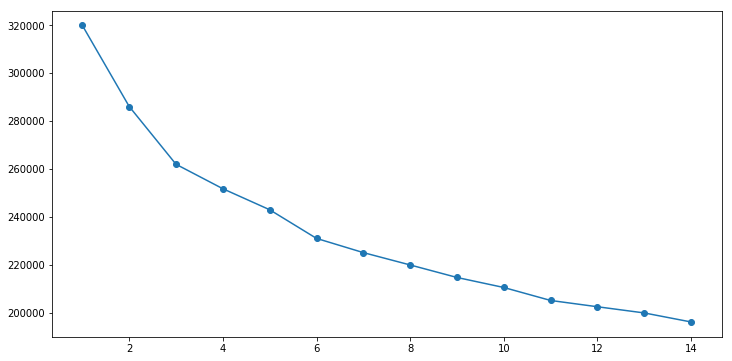

In [70]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [72]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=2345)

In [73]:
kmeans.fit(interest_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [74]:
centroids = kmeans.cluster_centers_

In [75]:
centroid_df = pd.DataFrame(centroids, columns = list(interest_df_z) )

In [76]:
centroid_df

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,age_imp,handsetAge_Imp,Churn_new
0,-0.177853,-0.133073,-0.193684,0.144984,0.360656,-0.339861,-2.994697,-0.489219,-0.405476,-0.342155,...,-0.003790,-0.373455,0.897340,-0.203707,-0.081486,-0.133419,0.022718,0.223784,1.379505,0.273349
1,0.177387,0.140643,-0.004528,-0.137789,-0.178775,0.874471,0.259542,0.824413,0.403840,0.106484,...,0.007176,1.440178,-0.031212,0.736423,-0.063054,-0.121560,0.038787,-0.220269,-0.664410,-0.120515
2,0.543248,0.238279,0.864409,-0.533831,-1.151283,-0.120613,0.236497,-0.057037,0.393221,1.313136,...,-0.002034,-0.073660,-0.284596,-0.001297,-0.102680,-0.133419,-0.017577,-0.555656,-0.182062,0.017517
3,-0.276531,-0.121848,-0.390197,0.265785,0.539916,-0.092219,0.327363,-0.079693,-0.205899,-0.606580,...,0.001379,-0.206526,-0.017262,-0.120348,-0.111727,-0.133419,-0.003868,0.279041,0.006046,-0.038922
4,0.121708,-0.032198,0.047629,-0.030134,-0.042295,0.720710,0.077597,0.500852,-0.043617,0.030526,...,-0.032722,0.198116,0.342266,0.078242,4.986608,6.506291,0.017202,0.003640,-0.266923,0.256281


In [77]:
churn_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

churn_labels['labels'] = churn_labels['labels'].astype('category')

In [78]:
churn_df_labeled = Churn_df_trimmed6.join(churn_labels)

In [79]:
churn_df_labeled.head()

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,age_imp,handsetAge_Imp,Churn_new,labels
0,1,2,1,1,6,1,0,0.00,2,1,...,0.00,60,0.00,0,0,0,26.0,1812.0,0,0
1,7,3,1,1,9,4,1,79.99,0,0,...,0.00,53,0.00,0,0,0,36.0,544.0,0,3
2,3,2,1,0,7,2,1,29.99,0,0,...,4.33,58,0.00,0,0,3,74.0,138.0,0,3
3,7,1,0,0,6,3,1,9.99,2,0,...,5.33,50,0.33,0,0,0,30.0,122.0,0,3
4,7,2,1,0,7,8,1,129.99,0,0,...,14.67,56,0.00,0,0,0,32.0,10.0,0,1


In [80]:
churn_analysis = churn_df_labeled.sort_values(by=['labels'],ascending=[True])
churn_analysis.head()

,occupation,regionType,marriageStatus,children,income,numHandsets,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,age_imp,handsetAge_Imp,Churn_new,labels
0,1,2,1,1,6,1,0,0.00,2,1,...,0.00,60,0.0,0,0,0,26.0,1812.0,0,0
5134,3,1,1,0,7,2,0,29.99,0,0,...,3.00,37,0.0,0,0,0,50.0,687.0,1,0
7578,1,3,0,0,2,2,0,149.99,2,0,...,3.00,19,0.0,0,0,0,44.0,5.0,1,0
5131,3,1,1,1,9,1,0,0.00,0,0,...,0.67,37,0.0,0,0,0,46.0,1125.0,1,0
5124,7,3,2,0,0,1,0,0.00,5,1,...,0.00,37,0.0,0,0,0,34.0,1140.0,1,0


In [81]:
labels = churn_analysis['labels']
Y = churn_analysis['Churn_new']

In [84]:
df = pd.DataFrame({'Clusters' : labels, 'Churn' : Y})
df.head()

,Churn,Clusters
0,0,0
5134,1,0
7578,1,0
5131,1,0
5124,1,0


In [86]:
df.groupby('Clusters').apply(lambda cluster: cluster.sum()/cluster.count())

,Churn,Clusters
Clusters,,
0,0.636674,0.0
1,0.439742,1.0
2,0.508758,2.0
3,0.480539,3.0
4,0.628141,4.0


### Based on K-Means clustering we have found out best number of clusters for the given set is 5.

### Cluster 0 has the heighest impact with 64%